In [1]:
%reset -f

In [2]:
import numpy as np
import pandas as pd
import datetime
import requests
import matplotlib.pyplot as plt

api_key = pd.read_json('fmp_api_key.json').iloc[0].to_list()[0]

In [3]:
### Financial Statements
revenuesExpenses = ['revenue',
 'costOfRevenue',
 'grossProfit',
 'researchAndDevelopmentExpenses',
 'generalAndAdministrativeExpenses',
 'sellingAndMarketingExpenses',
 'otherExpenses',                   
 'operatingExpenses',
 'costAndExpenses',
 'interestExpense',
 'depreciationAndAmortization',
 'operatingIncome',
 'totalOtherIncomeExpensesNet',
 'incomeBeforeTax', 
 'incomeTaxExpense',
 'netIncome']

headers = {'Content-Type': 'application/json'}

def get_income_statement(ticker, period):
    """ 
    Inputs: stock ticker and period of income_statement ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for income statement with revenues and expenses given in millions.  
    """  
    if period == 'FY':
        limit = 120
    else:
        limit = 400
        
    response = requests.get("https://financialmodelingprep.com/api/v3/income-statement/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)    
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df.convert_dtypes()

def get_balance_sheet_statement(ticker, period):
    """ 
    Inputs: stock ticker and period of balance-sheet-statement ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for balance-sheet-statement in $millions.  
    """   
    if period == 'FY':
        limit = 120
    else:
        limit = 400
    response = requests.get("https://financialmodelingprep.com/api/v3/balance-sheet-statement/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df.convert_dtypes()

def get_cash_flow_statement(ticker, period):
    """ 
    Inputs: stock ticker and period of cash-flow-statement ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for cash-flow-statement in $millions.  
    """   
    if period == 'FY':
        limit = 120
    else:
        limit = 400
    response = requests.get("https://financialmodelingprep.com/api/v3/cash-flow-statement/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df.convert_dtypes()

### Financial Statements Growth
def get_income_statement_growth(ticker, period='FY'):
    """ 
    Inputs: stock ticker and period of income-statement-growth ('FY' only). 
            Inputs must be of string type.
    Outputs: pandas dataframe for income-statement-growth. 
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/income-statement-growth/" +
                       ticker + "?period=" + period + "&apikey=" + api_key, headers=headers)    
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df.convert_dtypes()

def get_balance_sheet_statement_growth(ticker, period='FY'):
    """ 
    Inputs: stock ticker and period of balance-sheet-statement-growth ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for balance-sheet-statement-growth.
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/balance-sheet-statement-growth/" +
                       ticker + "?period=" + period + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df.convert_dtypes()

def get_cash_flow_statement_growth(ticker, period='FY'):
    """ 
    Inputs: stock ticker and period of cash-flow-statement-growth ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for cash-flow-statement-growth.
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/cash-flow-statement-growth/" +
                       ticker + "?period=" + period + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

### Company Financial Ratios
def get_financial_ratios_ttm(ticker):
    """ 
    Inputs: stock ticker (type: string)
    Outputs: pandas dataframe for company TTM ratios
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/ratios-ttm/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    
    return df.convert_dtypes()

def get_financial_ratios(ticker, period):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company ratios
    """   
    if period == 'FY':
        limit = 40
    else:
        limit = 140
    response = requests.get("https://financialmodelingprep.com/api/v3/ratios/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df.convert_dtypes()


### Company Key Metrics
def get_key_metrics_ttm(ticker):
    """ 
    Inputs: stock ticker (type: string)
    Outputs: pandas dataframe for company TTM key metrics
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/key-metrics-ttm/" +
                       ticker + "?limit=40" + "&apikey=" + api_key, headers=headers)
    if response.json() != []:
        df = pd.json_normalize(response.json())        
        return df.convert_dtypes()
    
    else:
        pass
    
def get_key_metrics(ticker, period):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company key metrics
    """   
    if period == 'FY':
        limit = 40
    else:
        limit = 130
        
    response = requests.get("https://financialmodelingprep.com/api/v3/key-metrics/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    if response.json() != []:
        df = pd.json_normalize(response.json())
        df['date'] = pd.to_datetime(df['date'])
        df.set_index(['symbol', 'date'], inplace=True)
        
        return df.convert_dtypes()
    
    else:
        pass

### Company Financial Growth
def get_financial_growth(ticker, period):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company financial growth
    """   
    if period == 'FY':
        limit = 20
    else:
        limit = 80
    response = requests.get("https://financialmodelingprep.com/api/v3/financial-growth/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df.convert_dtypes()

### Company Discounted cash flow value
def get_discounted_cash_flow(ticker):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company discounted cash flow
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/discounted-cash-flow/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df.convert_dtypes()

def get_hist_discounted_cash_flow(ticker, period):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company historical discounted cash flow
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/historical-discounted-cash-flow/" +
                       ticker + "?period=" + period + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json()[0]['historicalDCF'])
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['date'], inplace=True)
        
    return df.convert_dtypes()

def get_hist_discounted_cash_flow_daily(ticker):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company daily historical discounted cash flow
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/historical-daily-discounted-cash-flow/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df.convert_dtypes()


# Company Profile
def get_profile(ticker):
    """
    Inputs: stock ticker in string type
    Outputs: pandas dataframe for company profile
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/profile/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    if response.json() != []:
        df = pd.json_normalize(response.json())
        
        return df.transpose()
    
    else:
        pass

# Institutional holders
def get_institutional_holder(ticker):
    """
    Inputs: stock ticker in string type
    Outputs: dataframe for institutional holders
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/institutional-holder/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())    
    
    return df

# Market Capitalization
def get_market_cap(ticker):
    """
    Inputs: stock ticker in string type
    Outputs: pandas dataframe for company market capitalization
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/market-capitalization/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    
    df = pd.json_normalize(response.json())
        
    return df.transpose()
    

# Earnings Calendar
def get_earnings_calendar():
    """ 
    Inputs: none
    Outputs: dataframe for earnings calendar
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/earning_calendar/" +
                       "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

def get_hist_earnings_calendar(ticker):
    """ 
    Inputs: stock ticker in string type
    Outputs: dataframe for earnings calendar
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/historical/earning_calendar/" +
                       ticker + "?limit=30" + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    df['earningSurprise'] =  ((df['eps'] - df['epsEstimated']) / abs(df['epsEstimated'])) * 100
    
    return df

# Key Executives
def get_key_executives(ticker):
    """
    Inputs: stock ticker in string type
    Outputs: pandas dataframe for company key executives
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/key-executives/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    
    return df

# Insider Trading
def get_insider_trading(ticker):
    """
    Inputs: stock ticker in string type
    Outputs: pandas dataframe for insider trading
    """
    response = requests.get("https://financialmodelingprep.com/api/v4/insider-trading?" +
                       "symbol=" + ticker + "&limit=300" + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    
    return df

# Sectors PE Ratio
def get_sector_pe(date, exchange):
    """
    Inputs: stock ticker in string type
    Outputs: pandas dataframe for insider trading
    """
    response = requests.get("https://financialmodelingprep.com/api/v4/sector_price_earning_ratio?" +
                       "date=" + date + "&exchange=" + exchange + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    
    return df

# Industries PE Ratio
def get_industry_pe(date, exchange):
    """
    Inputs: stock ticker in string type
    Outputs: pandas dataframe for insider trading
    """
    response = requests.get("https://financialmodelingprep.com/api/v4/industry_price_earning_ratio?" +
                       "date=" + date + "&exchange=" + exchange + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    
    return df

In [112]:
ticker_of_interest = 'GM'
period = 'FY'

In [113]:
profile = get_profile(ticker_of_interest).iloc[[0,4,9,14,15,19,20,17]]
profile.loc['mktCap'] = profile.loc['mktCap'].apply(lambda x: x*1.0e-9) # mktCap in billions
profile

,0
symbol,GM
mktCap,74.269991
currency,USD
exchangeShortName,NYSE
industry,Auto Manufacturers
sector,Consumer Cyclical
country,US
description,"General Motors Company designs, builds, and se..."


In [114]:
metrics = get_key_metrics(ticker_of_interest, period)

In [115]:
metrics.head()

period  revenuePerShare  netIncomePerShare  \
symbol date                                                    
GM     2020-12-31     FY        85.534218           4.488128   
       2019-12-31     FY        96.374298           4.727528   
       2018-12-31     FY       104.216159            5.67966   
       2017-12-31     FY        99.377474          -2.637543   
       2016-12-31     FY       108.038961           6.121429   

                   operatingCashFlowPerShare  freeCashFlowPerShare  \
symbol date                                                          
GM     2020-12-31                  11.641061             -2.697626   
       2019-12-31                  10.548455             -6.302669   
       2018-12-31                   10.81219             -7.257973   
       2017-12-31                  11.827986              -7.03413   
       2016-12-31                  10.743506             -8.195455   

                   cashPerShare  bookValuePerShare  tangibleBookValuePerShare  \
symbol date                                                                     
GM     2020-12-31     20.277933          34.690642                  31.038408   
       2019-12-31     16.322331          32.273174                  28.525281   
       2018-12-31     19.000709          30.316797                  26.362863   
       2017-12-31     16.262799          24.709898                  20.717406   
       2016-12-31     16.104545           28.62013                  24.555844   

                   shareholdersEquityPerShare  interestDebtPerShare  ...  \
symbol date                                                          ...   
GM     2020-12-31                   34.690642              77.50838  ...   
       2019-12-31                   32.273174             73.108146  ...   
       2018-12-31                   30.316797             74.844791  ...   
       2017-12-31                   24.709898             64.705802  ...   
       2016-12-31                    28.62013             55.324675  ...   

                   averagePayables  averageInventory  daysSalesOutstanding  \
symbol date                                                                  
GM     2020-12-31      20473000000       10316500000            102.045638   
       2019-12-31      21018000000       10398000000              88.82641   
       2018-12-31      21657500000       10107000000             82.901856   
       2017-12-31      22473500000       10530500000             71.915439   
       2016-12-31      23989500000       12093000000             69.549195   

                   daysPayablesOutstanding  daysOfInventoryOnHand  \
symbol date                                                         
GM     2020-12-31                66.846057              34.332065   
       2019-12-31                62.236401              30.789519   
       2018-12-31                61.212186              26.947967   
       2017-12-31                69.319785              30.889585   
       2016-12-31                67.808889              34.677829   

                   receivablesTurnover  payablesTurnover  inventoryTurnover  \
symbol date                                                                   
GM     2020-12-31             3.576831          5.460307          10.631461   
       2019-12-31             4.109138          5.864735          11.854684   
       2018-12-31             4.402796          5.962865          13.544621   
       2017-12-31             5.075405          5.265452          11.816281   
       2016-12-31             5.248084          5.382775          10.525457   

                        roe  capexPerShare  
symbol date                                 
GM     2020-12-31  0.129376     -14.338687  
       2019-12-31  0.146485     -16.851124  
       2018-12-31  0.187344     -18.070163  
       2017-12-31  -0.10674     -18.862116  
       2016-12-31  0.213885     -18.938961  

[5 rows x 58 columns]

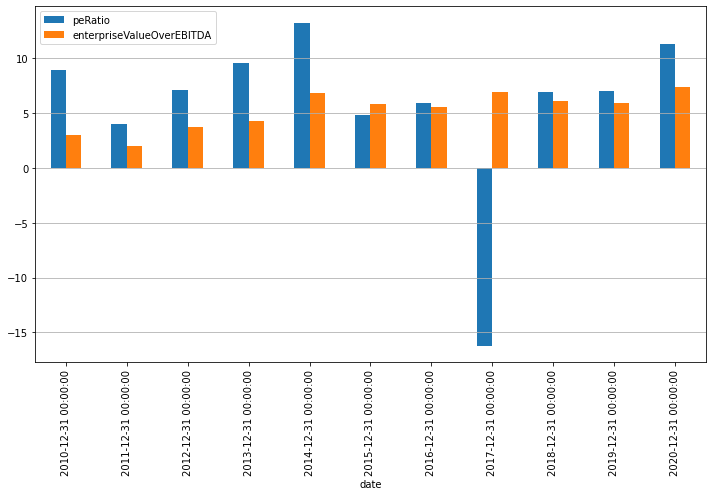

In [116]:
metrics.loc[ticker_of_interest][['peRatio', 'enterpriseValueOverEBITDA']][:20].sort_index().plot.bar(figsize = (10,7)).grid(axis='y');
plt.tight_layout()

In [117]:
metrics.loc[ticker_of_interest][['peRatio', 'enterpriseValueOverEBITDA']][:5]

,peRatio,enterpriseValueOverEBITDA
date,,
2020-12-31,11.292012,7.34719
2019-12-31,7.050197,5.879957
2018-12-31,6.882454,6.104813
2017-12-31,-16.189312,6.889173
2016-12-31,5.934889,5.591561


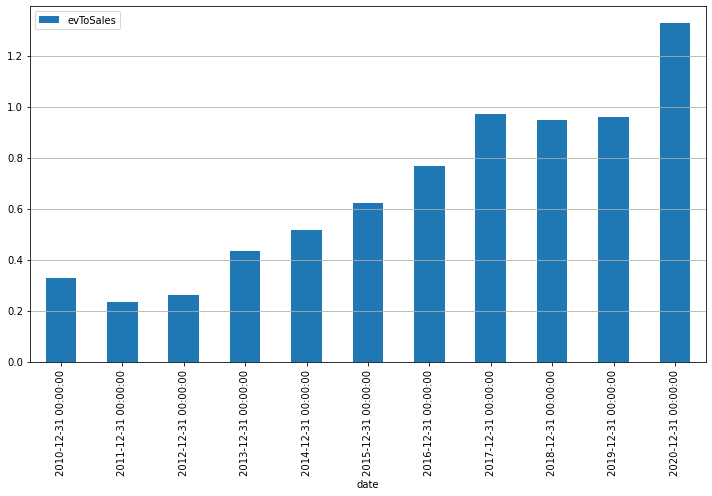

In [118]:
metrics.loc[ticker_of_interest][['evToSales']][:20].sort_index().plot.bar(figsize = (10,7)).grid(axis='y');
plt.tight_layout()

In [119]:
metrics.loc[ticker_of_interest][['evToSales']][:2]

,evToSales
date,
2020-12-31,1.326495
2019-12-31,0.959777


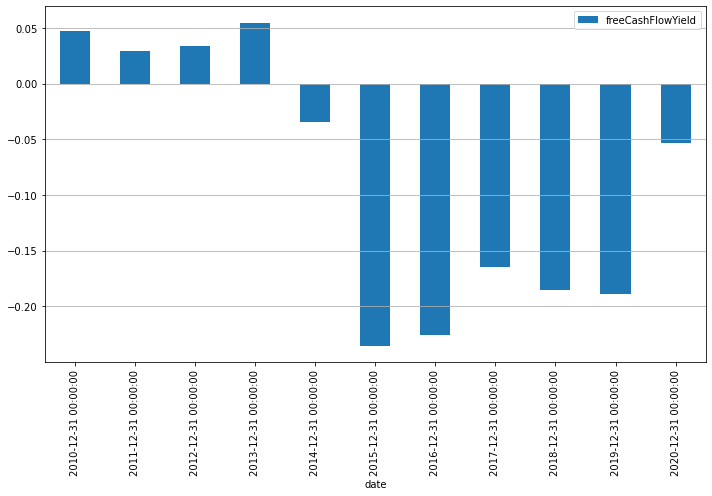

In [120]:
metrics.loc[ticker_of_interest][['freeCashFlowYield']][:20].sort_index().plot.bar(figsize = (10,7)).grid(axis='y');
plt.tight_layout()

In [121]:
metrics.loc[ticker_of_interest][['freeCashFlowYield']][:3]

,freeCashFlowYield
date,
2020-12-31,-0.053229
2019-12-31,-0.189099
2018-12-31,-0.185673


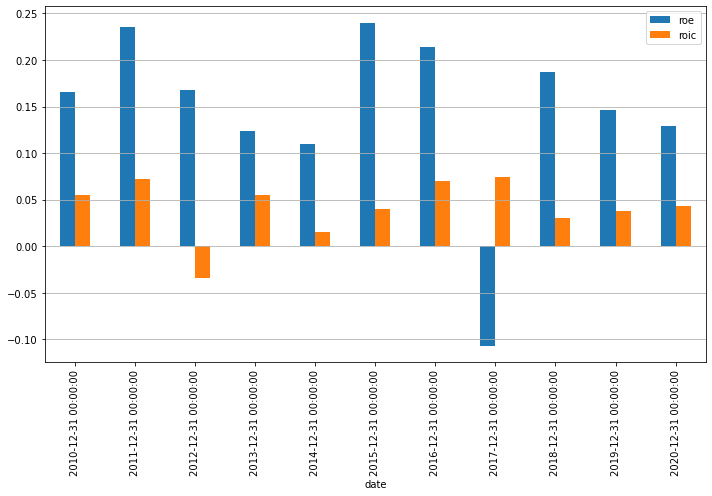

In [122]:
metrics.loc[ticker_of_interest][['roe', 'roic']][:20].sort_index().plot.bar(figsize = (10,7)).grid(axis='y');
plt.tight_layout()

In [123]:
metrics.loc[ticker_of_interest][['roe', 'roic']][:3]

,roe,roic
date,,
2020-12-31,0.129376,0.042722
2019-12-31,0.146485,0.038293
2018-12-31,0.187344,0.030634


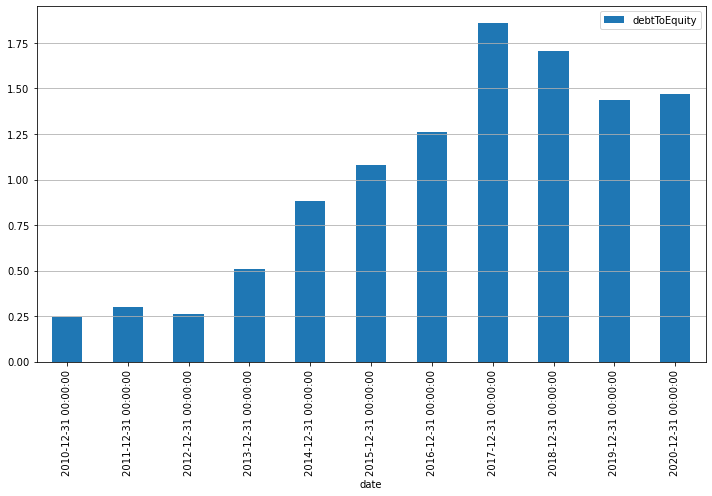

In [124]:
metrics.loc[ticker_of_interest][['debtToEquity']][:20].sort_index().plot.bar(figsize = (10,7)).grid(axis='y');
plt.tight_layout()

In [125]:
metrics.loc[ticker_of_interest][['debtToEquity']][:5]

,debtToEquity
date,
2020-12-31,1.46911
2019-12-31,1.434471
2018-12-31,1.707927
2017-12-31,1.857845
2016-12-31,1.261486


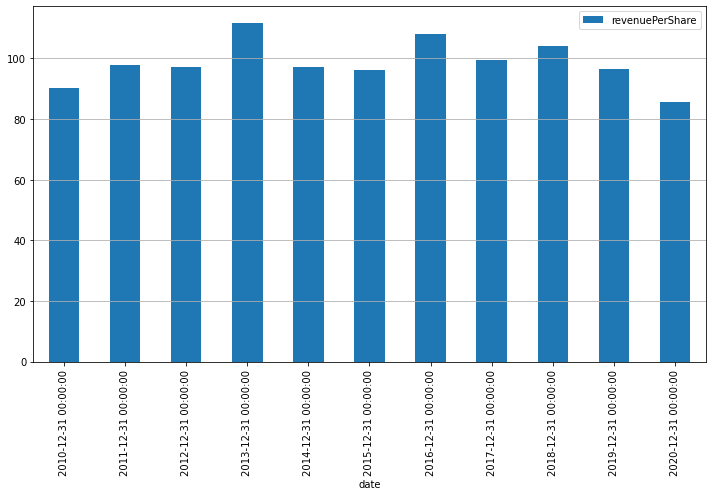

In [126]:
metrics.loc[ticker_of_interest][['revenuePerShare']][:20].sort_index().plot.bar(figsize = (10,7)).grid(axis='y');
plt.tight_layout()

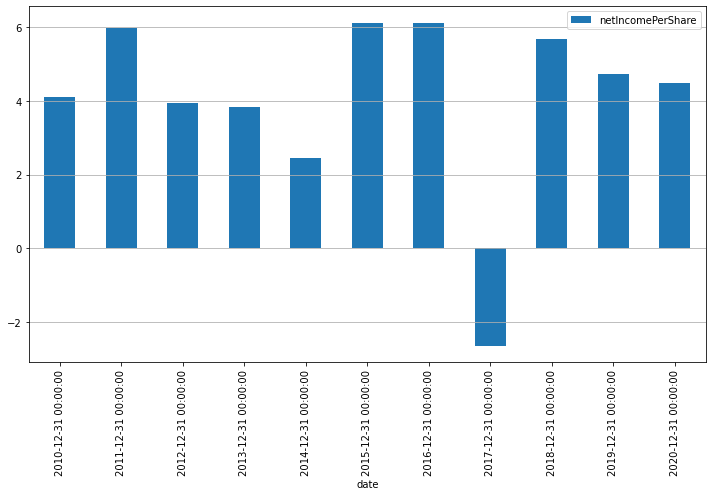

In [127]:
metrics.loc[ticker_of_interest][['netIncomePerShare']][:20].sort_index().plot.bar(figsize = (10,7)).grid(axis='y');
plt.tight_layout()

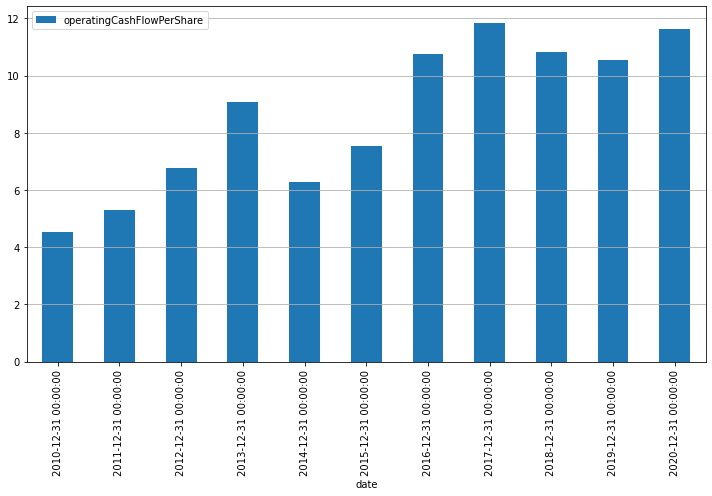

In [128]:
metrics.loc[ticker_of_interest][['operatingCashFlowPerShare']][:20].sort_index().plot.bar(figsize = (10,7)).grid(axis='y');
plt.tight_layout()

### Income Statement

In [129]:
df_income = get_income_statement(ticker_of_interest, period)
df_income.head()

reportedCurrency          fillingDate         acceptedDate  \
symbol date                                                                    
GM     2020-12-31              USD           2021-02-10  2021-02-10 15:48:19   
       2019-12-31              USD  2020-02-05 00:00:00  2020-02-05 16:02:53   
       2018-12-31              USD  2019-02-06 00:00:00  2019-02-06 16:46:41   
       2017-12-31              USD  2018-02-06 00:00:00  2018-02-06 12:34:06   
       2016-12-31              USD  2017-02-07 00:00:00  2017-02-07 11:42:59   

                  period       revenue  costOfRevenue  grossProfit  \
symbol date                                                          
GM     2020-12-31     FY  122485000000   108813000000  13672000000   
       2019-12-31     FY  137237000000   123265000000  13972000000   
       2018-12-31     FY  147049000000   132954000000  14095000000   
       2017-12-31     FY  145588000000   125997000000  19591000000   
       2016-12-31     FY  166380000000   145125000000  21255000000   

                   grossProfitRatio  researchAndDevelopmentExpenses  \
symbol date                                                           
GM     2020-12-31          0.111622                               0   
       2019-12-31          0.101809                               0   
       2018-12-31          0.095852                               0   
       2017-12-31          0.134565                               0   
       2016-12-31           0.12775                               0   

                   generalAndAdministrativeExpenses  ...  \
symbol date                                          ...   
GM     2020-12-31                        7038000000  ...   
       2019-12-31                        8491000000  ...   
       2018-12-31                        9650000000  ...   
       2017-12-31                        9575000000  ...   
       2016-12-31                       11710000000  ...   

                   incomeBeforeTaxRatio  incomeTaxExpense    netIncome  \
symbol date                                                              
GM     2020-12-31               0.06609        1774000000   6427000000   
       2019-12-31              0.054184         769000000   6732000000   
       2018-12-31              0.058137         474000000   8014000000   
       2017-12-31              0.081483       11533000000  -3864000000   
       2016-12-31              0.070225        2416000000   9427000000   

                   netIncomeRatio       eps  epsdiluted  \
symbol date                                               
GM     2020-12-31        0.052472  4.513343    4.513343   
       2019-12-31        0.049054      4.62        4.57   
       2018-12-31        0.054499      5.61        5.53   
       2017-12-31       -0.026541 -2.637543   -2.589812   
       2016-12-31        0.056659      6.12         6.0   

                   weightedAverageShsOut  weightedAverageShsOutDil  \
symbol date                                                          
GM     2020-12-31             1432000000                1432000000   
       2019-12-31             1424000000                1439000000   
       2018-12-31             1411000000                1431000000   
       2017-12-31             1465000000                1492000000   
       2016-12-31             1540000000                1570000000   

                                                                link  \
symbol date                                                            
GM     2020-12-31  https://www.sec.gov/Archives/edgar/data/146785...   
       2019-12-31  https://www.sec.gov/Archives/edgar/data/146785...   
       2018-12-31  https://www.sec.gov/Archives/edgar/data/146785...   
       2017-12-31  https://www.sec.gov/Archives/edgar/data/146785...   
       2016-12-31  https://www.sec.gov/Archives/edgar/data/146785...   

                                                           finalLink  
symbol date                                    

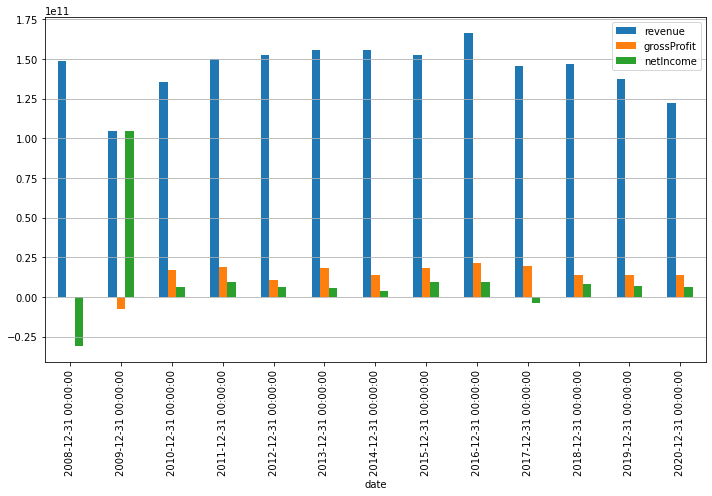

In [130]:
df_income.loc[ticker_of_interest][['revenue', 'grossProfit', 'netIncome']][:20].sort_index().plot.bar(figsize = (10,7)).grid(axis='y');
plt.tight_layout()

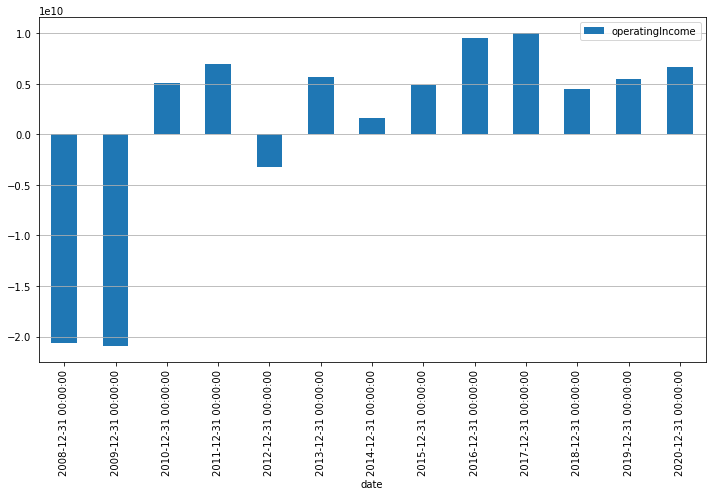

In [131]:
df_income.loc[ticker_of_interest][['operatingIncome']][:20].sort_index().plot.bar(figsize = (10,7)).grid(axis='y');
plt.tight_layout()

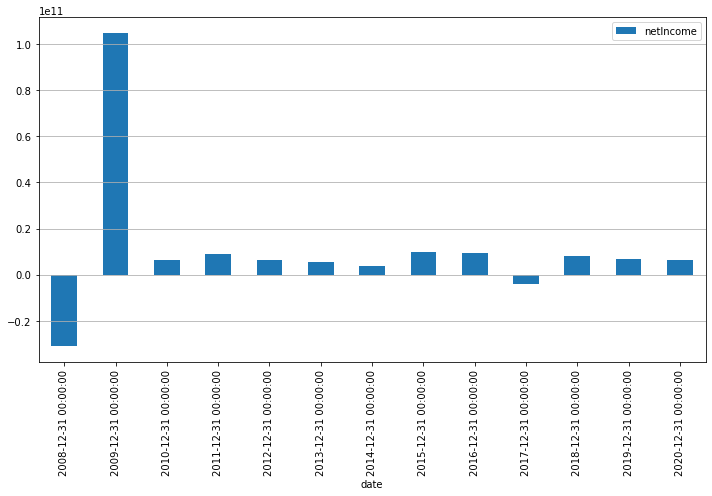

In [132]:
df_income.loc[ticker_of_interest][['netIncome']][:20].sort_index().plot.bar(figsize = (10,7)).grid(axis='y');
plt.tight_layout()

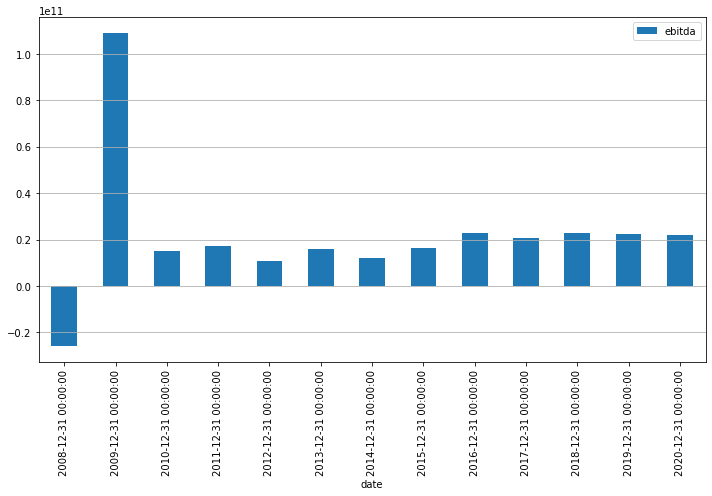

In [133]:
df_income.loc[ticker_of_interest][['ebitda']][:20].sort_index().plot.bar(figsize = (10,7)).grid(axis='y');
plt.tight_layout()

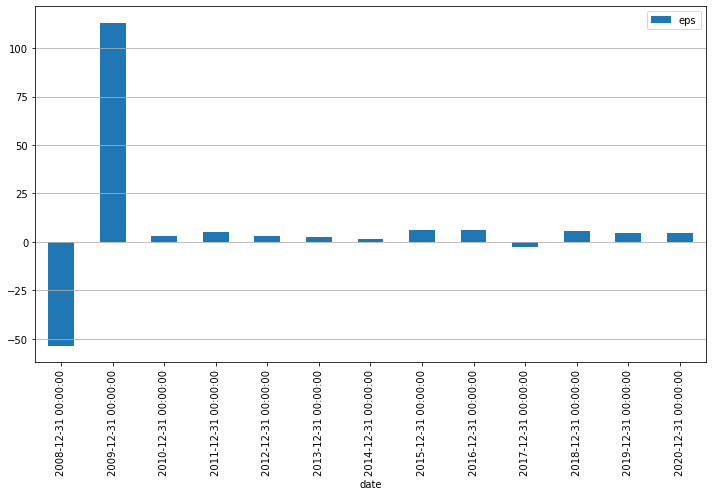

In [134]:
df_income.loc[ticker_of_interest][['eps']][:20].sort_index().plot.bar(figsize = (10,7)).grid(axis='y');
plt.tight_layout()

In [135]:
df_income.loc[ticker_of_interest][['eps']][:5]

,eps
date,
2020-12-31,4.513343
2019-12-31,4.62
2018-12-31,5.61
2017-12-31,-2.637543
2016-12-31,6.12


### Multiples

In [136]:
if period == 'FY':
    
    mktCap = get_market_cap(ticker_of_interest).loc['marketCap'].values[0]
    mktCapOverEbitda = mktCap/df_income.loc[ticker_of_interest][['ebitda']].values[0][0]
    mktCapOverRevenue = mktCap/df_income.loc[ticker_of_interest][['revenue']].values[0][0]

    print(df_income.loc[ticker_of_interest][['ebitda']][:5])
    print('\n')
    print('Market Cap in billions:', mktCap/1.0e9)
    print('\n')
    print('Market Cap/EBITDA:', mktCapOverEbitda)
    print('Market Cap/Revenue:', mktCapOverRevenue)
    print('\n')
    print('EV/EBITDA')
    print('\n')
    print(metrics['enterpriseValueOverEBITDA'][:3])
    
else:
    pass

                 ebitda
date                   
2020-12-31  22114000000
2019-12-31  22401000000
2018-12-31  22812000000
2017-12-31  20505000000
2016-12-31  22823000000


Market Cap in billions: 71.37416


Market Cap/EBITDA: 3.2275553947725424
Market Cap/Revenue: 0.5827175572519084


EV/EBITDA


symbol  date      
GM      2020-12-31     7.34719
        2019-12-31    5.879957
        2018-12-31    6.104813
Name: enterpriseValueOverEBITDA, dtype: Float64


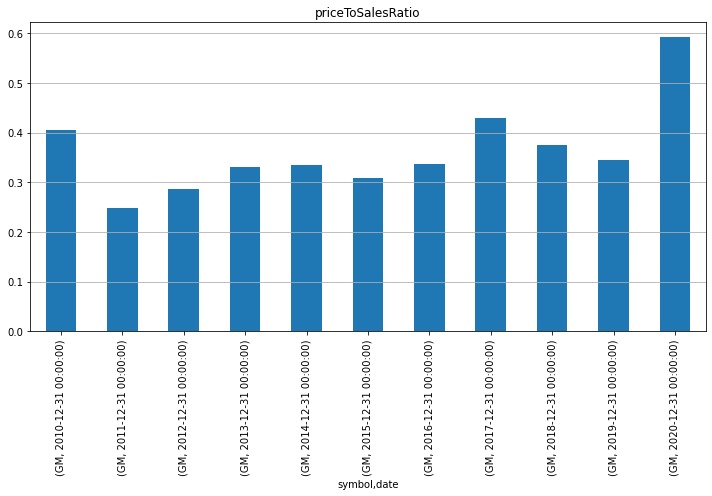

In [137]:
metrics['priceToSalesRatio'][:20].sort_index().plot.bar(figsize = (10,7), title='priceToSalesRatio').grid(axis='y')
plt.tight_layout()

### Cashflow Statement

In [138]:
df_cashflow = get_cash_flow_statement(ticker_of_interest, period)
#df_cashflow = df_cashflow.iloc[:, 4:-2].apply(lambda x:x*1.0e-6)
df_cashflow.head()

reportedCurrency          fillingDate         acceptedDate  \
symbol date                                                                    
GM     2020-12-31              USD           2021-02-10  2021-02-10 15:48:19   
       2019-12-31              USD  2020-02-05 00:00:00  2020-02-05 16:02:53   
       2018-12-31              USD  2019-02-06 00:00:00  2019-02-06 16:46:41   
       2017-12-31              USD  2018-02-06 00:00:00  2018-02-06 12:34:06   
       2016-12-31              USD  2017-02-07 00:00:00  2017-02-07 11:42:59   

                  period    netIncome  depreciationAndAmortization  \
symbol date                                                          
GM     2020-12-31     FY   6427000000                  12815000000   
       2019-12-31     FY   6732000000                  14118000000   
       2018-12-31     FY   8014000000                  13669000000   
       2017-12-31     FY  -3864000000                  12261000000   
       2016-12-31     FY   9427000000                  10408000000   

                   deferredIncomeTax  stockBasedCompensation  \
symbol date                                                    
GM     2020-12-31          925000000                       0   
       2019-12-31         -133000000                       0   
       2018-12-31         -112000000                       0   
       2017-12-31        10880000000                       0   
       2016-12-31         1886000000                       0   

                   changeInWorkingCapital  accountsReceivables  ...  \
symbol date                                                     ...   
GM     2020-12-31             10927000000          -1341000000  ...   
       2019-12-31             -2969000000           -563000000  ...   
       2018-12-31              1202000000            492000000  ...   
       2017-12-31               832000000           1402000000  ...   
       2016-12-31            -15519000000          -1285000000  ...   

                   netCashUsedProvidedByFinancingActivities  \
symbol date                                                   
GM     2020-12-31                                5552000000   
       2019-12-31                               -4677000000   
       2018-12-31                               11454000000   
       2017-12-31                               12584000000   
       2016-12-31                               17139000000   

                   effectOfForexChangesOnCash  netChangeInCash  \
symbol date                                                      
GM     2020-12-31                  -222000000        174000000   
       2019-12-31                     2000000       -553000000   
       2018-12-31                  -299000000       5648000000   
       2017-12-31                   348000000       2688000000   
       2016-12-31                  -213000000      -2172000000   

                   cashAtEndOfPeriod  cashAtBeginningOfPeriod  \
symbol date                                                     
GM     2020-12-31        23117000000              22943000000   
       2019-12-31        22943000000              23496000000   
       2018-12-31        23496000000              17848000000   
       2017-12-31        17848000000              15160000000   
       2016-12-31        15160000000              17332000000   

                   operatingCashFlow  capitalExpenditure  freeCashFlow  \
symbol date                                                              
GM     2020-12-31        16670000000        -20533000000   -3863000000   
       2019-12-31        15021000000        -23996000000   -8975000000   
       2018-12-31        15256000000        -25497000000  -10241000000   
       2017-12-31        17328000000        -27633000000  -10305000000   
       2016-12-31        16545000000        -29166000000  -12621000000   

                                                                link  \
symbol date                                                        

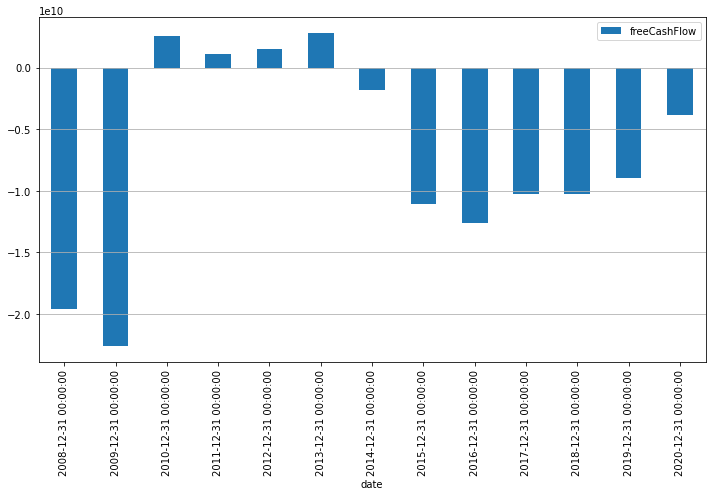

In [139]:
df_cashflow.loc[ticker_of_interest][['freeCashFlow']][:20].sort_index().plot.bar(figsize = (10,7)).grid(axis='y');
plt.tight_layout()

### Insider Trading

In [140]:
insider_trading = get_insider_trading(ticker_of_interest)
insider_trading['transactionType'].value_counts()

A-Award       122
M-Exempt       86
S-Sale         53
F-InKind       32
P-Purchase      5
G-Gift          2
Name: transactionType, dtype: int64

In [141]:
insider_sale = insider_trading[insider_trading['transactionType'] == 'S-Sale']
insider_sale.head(3)

,symbol,transactionDate,reportingCik,transactionType,securitiesOwned,companyCik,reportingName,typeOfOwner,acquistionOrDisposition,formType,securitiesTransacted,price,securityName,link
4,GM,2021-06-11,0001594133,S-Sale,44534.0,0001467858,Tsien Matthew,officer: Executive Vice President,D,4,38234.0,62.83,Common Stock,https://www.sec.gov/Archives/edgar/data/000146...
6,GM,2021-06-11,0001594133,S-Sale,82768.0,0001467858,Tsien Matthew,officer: Executive Vice President,D,4,154752.0,31.32,Common Stock,https://www.sec.gov/Archives/edgar/data/000146...
9,GM,2021-06-09,0001109494,S-Sale,116113.0,0001467858,MOTT RANDALL D,officer: Executive Vice President & CIO,D,4,6000.0,31.32,Common Stock,https://www.sec.gov/Archives/edgar/data/000146...


In [142]:
insider_sale_date = insider_sale[['transactionDate', 'securitiesTransacted']].groupby(['transactionDate']).sum()
insider_sale_date.sort_index(ascending=False).head()

,securitiesTransacted
transactionDate,
2021-06-11,192986.0
2021-06-09,6000.0
2021-06-07,115989.0
2021-04-06,78565.0
2021-04-05,67829.0


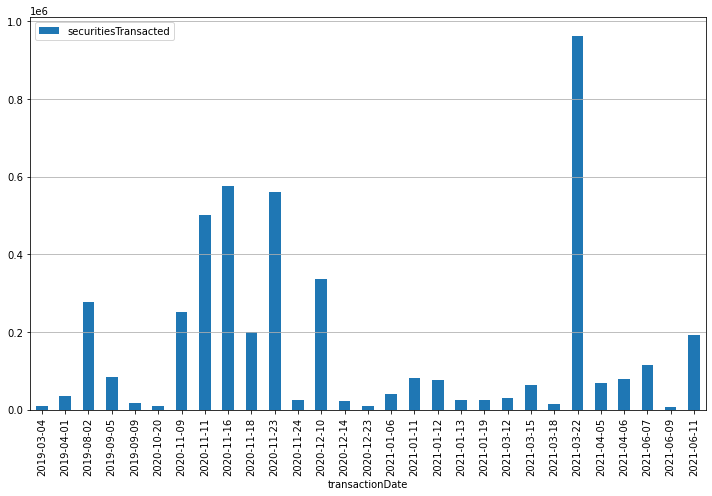

In [143]:
insider_sale_date.plot.bar(figsize = (10,7)).grid(axis='y');
plt.tight_layout()

### Earning Surprises

In [144]:
# get earning report date
try:
    print(get_earnings_calendar().loc[ticker_of_interest])
    
except KeyError:
    print(ticker_of_interest, 'not found')

GM not found


In [145]:
hist_earnings = get_hist_earnings_calendar(ticker_of_interest)
hist_earnings[:10]

eps  epsEstimated time       revenue  revenueEstimated  \
symbol date                                                                  
GM     2021-08-04  1.97          1.89  bmo  3.416700e+10      3.089460e+10   
       2021-05-05  2.25          1.04  bmo  3.247400e+10      2.956032e+10   
       2021-02-10  1.93          1.60  bmo  3.751800e+10      2.977991e+10   
       2020-11-05  2.83          1.38  bmo  3.548000e+10      3.382471e+10   
       2020-07-29 -0.50         -1.77  bmo  1.677800e+10      5.939412e+10   
       2020-05-06  0.62          0.30  bmo  3.270900e+10      2.732224e+10   
       2020-02-05  0.05          0.01  bmo  3.082600e+10      6.165200e+09   
       2019-10-29  1.72          1.31  bmo  3.547300e+10      2.701723e+10   
       2019-08-01  1.64          1.44  bmo  3.606000e+10      3.166244e+10   
       2019-04-30  1.41          1.11  bmo  3.487800e+10      2.745715e+10   

                   earningSurprise  
symbol date                         
GM     2021-08-04         4.232804  
       2021-05-05       116.346154  
       2021-02-10        20.625000  
       2020-11-05       105.072464  
       2020-07-29        71.751412  
       2020-05-06       106.666667  
       2020-02-05       400.000000  
       2019-10-29        31.297710  
       2019-08-01        13.888889  
       2019-04-30        27.027027

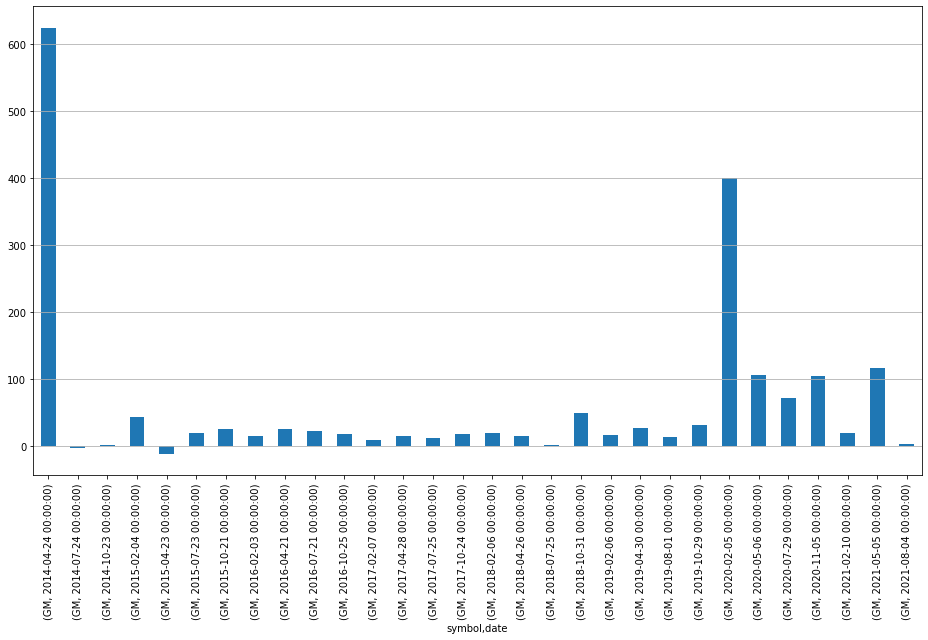

In [154]:
hist_earnings['earningSurprise'].sort_index().plot.bar(figsize = (13,9)).grid(axis='y')
plt.tight_layout()

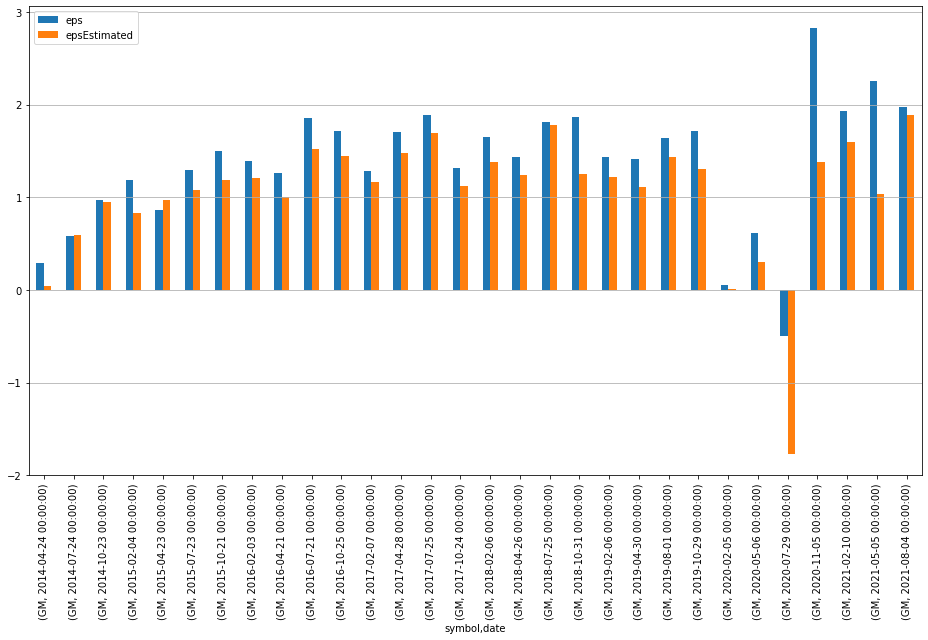

In [155]:
hist_earnings[['eps', 'epsEstimated']].sort_index().plot.bar(figsize = (13,9)).grid(axis='y')
plt.tight_layout()